In [1]:
#importing basic libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load Iris dataset
df = pd.read_csv("../input/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

**Dataset Cleanup for exploratory analysis**

In [7]:
#Removing the column "Id" as its not necessary for analysis or modeling
df.drop('Id',axis=1, inplace=True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


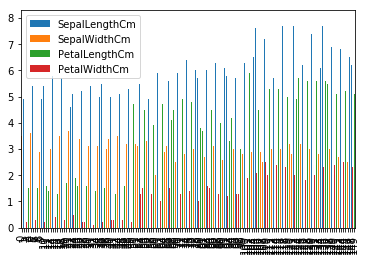

In [9]:
df.plot.bar()

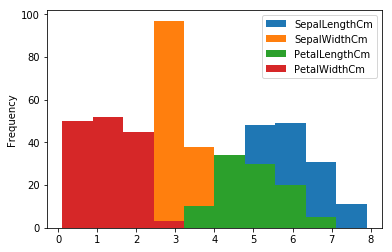

In [10]:
df.plot.hist()

**Final Dataset prepration for apply machine learning models**

In [11]:
#Encode catogrical target variable 'Series' into numerical value so that it can be 
#plugged into Scikit learn ML libraries

mapper = {'Iris-setosa' : 0,
          'Iris-virginica' : 1,
          'Iris-versicolor' :2
          }

df['Species'] = df['Species'].map(mapper)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Prepare data for training
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Data Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


**Appliying Machine learning Algorithms**

In [16]:
#Importing ML libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

#Training
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

#Prediction
y_pred = classifier.predict(X_test)

In [17]:
print("Accuracy on Training Set: ", accuracy_score(y_train, classifier.predict(X_train)))
print("Classification Report on Training Set: \n", classification_report(y_train, classifier.predict(X_train)))
print("Confusion Matrix on Training Set: \n", confusion_matrix(y_train, classifier.predict(X_train)))
print("Average Accuracy on Training Set: \n", np.mean(cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')))


Accuracy on Training Set:  1.0
Classification Report on Training Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        34

   micro avg       1.00      1.00      1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

Confusion Matrix on Training Set: 
 [[37  0  0]
 [ 0 41  0]
 [ 0  0 34]]
Average Accuracy on Training Set: 
 0.9273076923076923


In [18]:
print("Accuracy on Test Set", accuracy_score(y_test, classifier.predict(X_test)))
print("Classification Report on Test Set: ", classification_report(y_test, classifier.predict(X_test)))
print("Confusion Matrix on Test Set: ",confusion_matrix(y_test, classifier.predict(X_test)))
print("Average Accuracy on Test Set: \n", np.mean(cross_val_score(classifier, X_test, y_test, cv=10, scoring='accuracy')))


Accuracy on Test Set 0.9736842105263158
Classification Report on Test Set:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.94      0.97        16

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix on Test Set:  [[13  0  0]
 [ 0  9  0]
 [ 0  1 15]]
Average Accuracy on Test Set: 
 0.95
